Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
NetworkNodes: t = 23.9072, p = 2.331e-71
NetworkEdges: t = -30.9934, p = 2.241e-95
NetworkDegree: t = -19.4025, p = 7.541e-55
NetworkDensity: t = 18.1891, p = 2.691e-50
NetworkAvgClustering: t = 22.7261, p = 4.159e-67
NetworkLargestComponent: t = 1.7217, p = 0.08616
NetworkDegreeWeighted: t = -20.6822, p = 1.298e-59
NetworkNodes


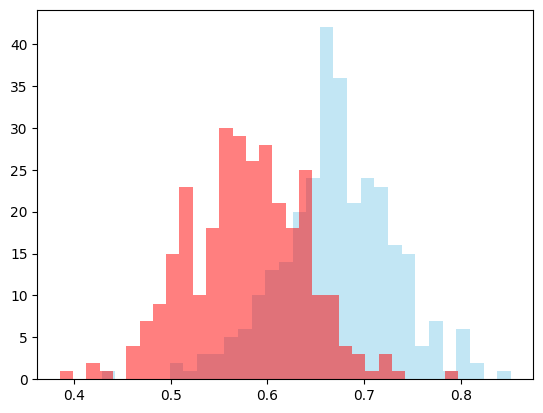

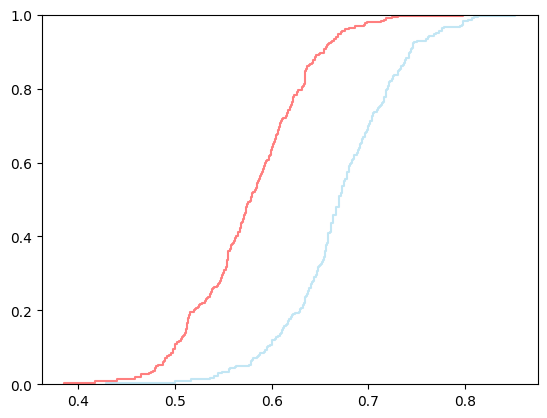

NetworkEdges


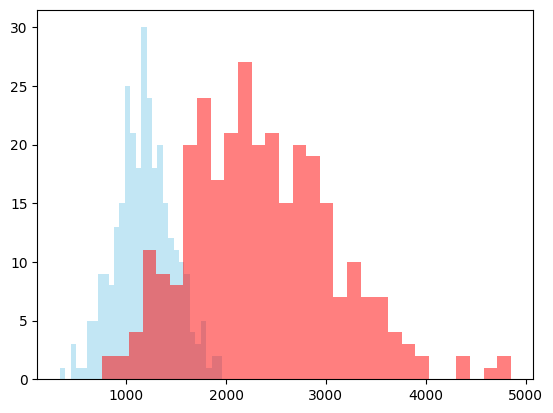

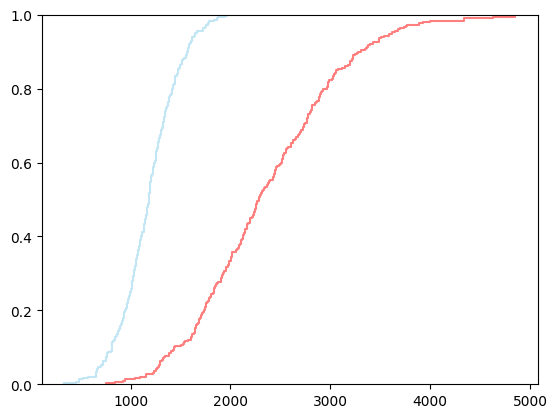

NetworkDegree


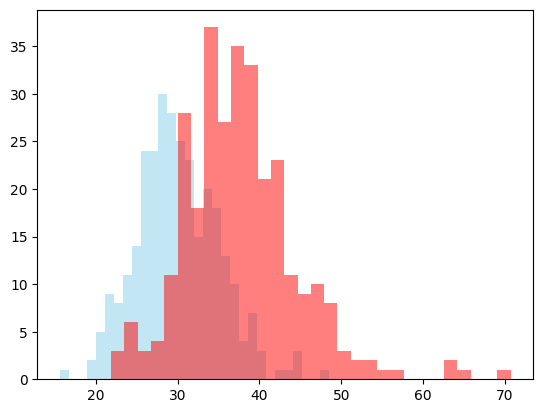

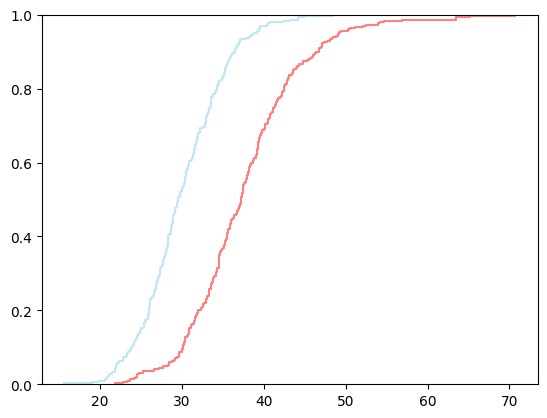

NetworkDensity


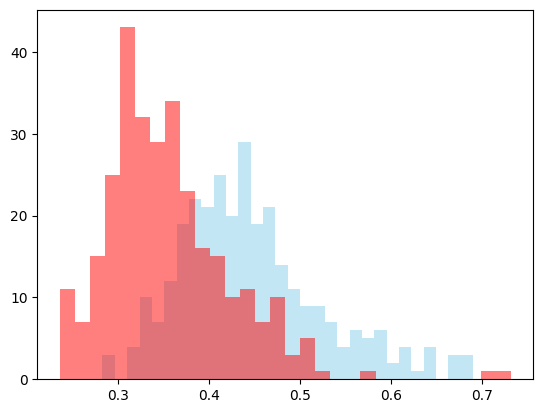

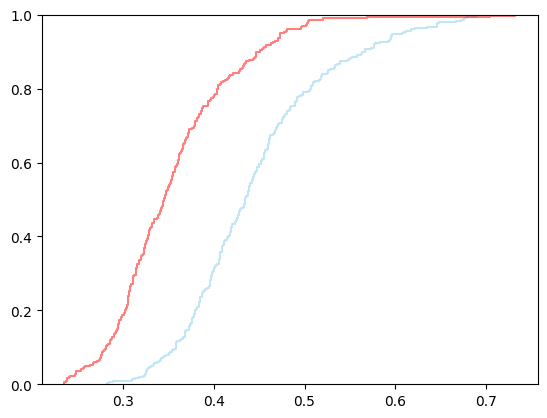

NetworkAvgClustering


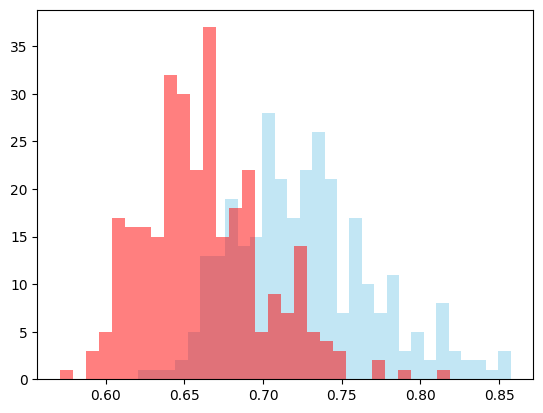

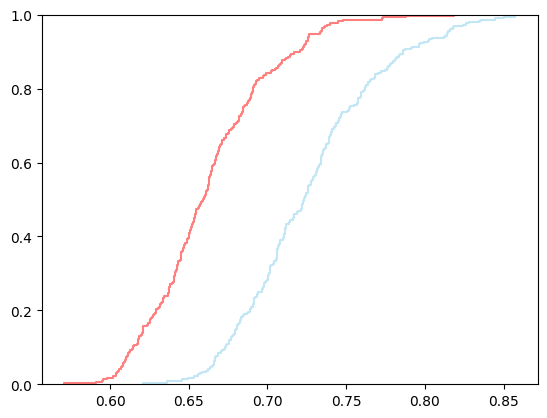

NetworkLargestComponent


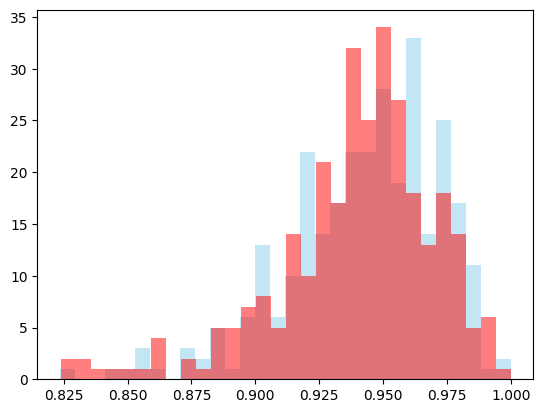

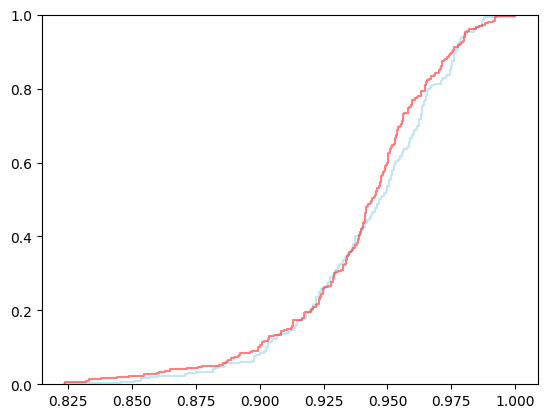

NetworkDegreeWeighted


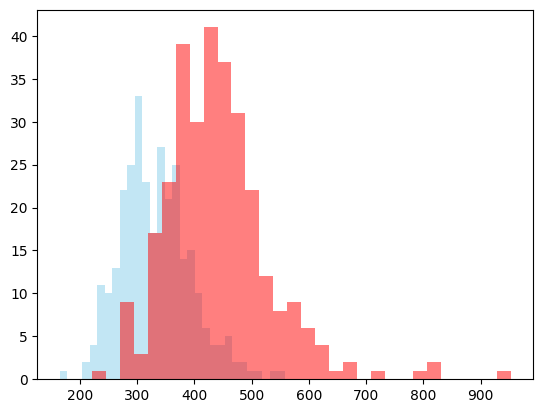

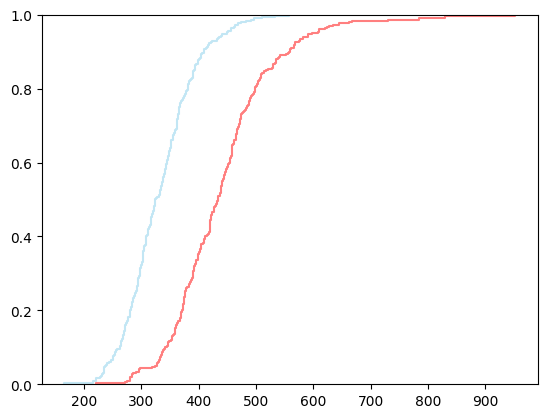

{'NetworkNodes': {'q1': np.float64(0.6375350631136044), 'q2': np.float64(0.7108226647700332), 'mean': np.float64(0.6696428571428571)}, 'NetworkEdges': {'q1': np.float64(1003.0), 'q2': np.float64(1360.25), 'mean': np.float64(1185.0)}, 'NetworkDegree': {'q1': np.float64(26.616666666666667), 'q2': np.float64(33.41374936580416), 'mean': np.float64(29.499687304565352)}, 'NetworkDensity': {'q1': np.float64(0.38807901068770634), 'q2': np.float64(0.48417260739912404), 'mean': np.float64(0.43506493506493504)}, 'NetworkAvgClustering': {'q1': np.float64(0.6959313621202239), 'q2': np.float64(0.7521573470002556), 'mean': np.float64(0.7232714677932626)}, 'NetworkLargestComponent': {'q1': np.float64(0.9237040133779264), 'q2': np.float64(0.9636363636363636), 'mean': np.float64(0.9470175438596491)}, 'NetworkDegreeWeighted': {'q1': np.float64(291.1670778210736), 'q2': np.float64(366.3685729041369), 'mean': np.float64(325.07363207778917)}}
{'NetworkNodes': {'q1': np.float64(0.537773805961923), 'q2': np.f

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd


import re


import itertools


import math

import networkx as nx

import numpy as np

file_path = '/content/drive/My Drive/Colab Notebooks/FinalizedSummaries.csv'


# Load the CSV
df = pd.read_csv(file_path)


df = df.iloc[:300]



def build_pmi_graph(pmi_scores, all_nodes):
    G = nx.Graph()
    G.add_nodes_from(all_nodes)
    for (w1, w2), weight in pmi_scores.items():
        G.add_edge(w1, w2, weight=weight)
    return G

def analyze_graph(G, words):

    connected_nodes = [node for node, degree in G.degree() if degree > 0]

    return {
        'nodes per words': len(connected_nodes) / words,
        'edges': int(G.number_of_edges()),
        'avg_degree' : sum(dict(G.degree()).values()) / G.number_of_nodes(),
        'density': nx.density(G.subgraph(connected_nodes)),
        'average clustering': nx.average_clustering(G.subgraph(connected_nodes), weight='weight'),
        'largest_component_size':len(max(nx.connected_components(G), key=len)) / G.number_of_nodes(),
        'avg_degree_weighted': sum(dict(G.subgraph(connected_nodes).degree(weight='weight')).values()) / len(connected_nodes)
    }




def findNetworkComplexity(Column):

    NetworkNodes = {}
    NetworkEdges = {}
    NetworkDegree = {}
    NetworkDensity = {}
    NetworkAvgClustering = {}
    NetworkLargestComponent = {}
    NetworkDegreeWeighted = {}
    MasterDictionary = {'NetworkNodes':NetworkNodes, 'NetworkEdges':NetworkEdges, 'NetworkDegree':NetworkDegree, 'NetworkDensity': NetworkDensity, 'NetworkAvgClustering':NetworkAvgClustering, 'NetworkLargestComponent': NetworkLargestComponent, 'NetworkDegreeWeighted': NetworkDegreeWeighted}


    count = 0

    for summary in df[Column]:
        count += 1
        wordsDict = {}

        wordsList = [word.lower() for word in re.findall(r'\b[a-zA-Z]+\b', summary)]
        sentences = re.split(r'(?<=[.!?])\s+', summary)

        for word in wordsList:
            if word in wordsDict:
                wordsDict[word] += 1
            else:
                wordsDict[word] = 1

        keys = list(wordsDict.keys())
        pairsDict = {pair: 0 for pair in itertools.combinations(keys, 2)}

        for pair in pairsDict:
            w1, w2 = pair
            w1Freq = 0
            w2Freq = 0
            mutualOccurences = 0
            numSentences = len(sentences)

            for word in wordsList:
              if word == w1:
                w1Freq += 1
              elif word == w2:
                w2Freq += 1

            for sentence in sentences:
                if w1 in sentence and w2 in sentence:
                  mutualOccurences += 1

            pW1 = w1Freq / len(wordsList)
            pW2 = w2Freq / len(wordsList)
            pW1W2 = mutualOccurences / numSentences

            if pW1W2 > 0:
                pairsDict[pair] = math.log2(pW1W2 / (pW1 * pW2))

        refinedPairsDict = {}

        for pair in pairsDict:

          if pairsDict[pair] != 0:

            refinedPairsDict[pair] = pairsDict[pair]

        graphMetrics = analyze_graph(build_pmi_graph(refinedPairsDict, set(wordsList)), len(wordsList))
        NetworkNodes[count] = graphMetrics['nodes per words']
        NetworkEdges[count] = graphMetrics['edges']
        NetworkDegree[count] = graphMetrics['avg_degree']
        NetworkDensity[count] = graphMetrics['density']
        NetworkAvgClustering[count] = graphMetrics['average clustering']
        NetworkLargestComponent[count] = graphMetrics['largest_component_size']
        NetworkDegreeWeighted[count] = graphMetrics['avg_degree_weighted']



    return(MasterDictionary)


lay_dict = findNetworkComplexity("Lay Summary")
tech_dict = findNetworkComplexity("Technical Summary")

#note: all instances of q2 should be q3, all instances of mean should be median

layQ1Q2Mean = {"NetworkNodes":{'q1':0,'q2':0}, 'NetworkEdges': {'q1':0,'q2':0}, 'NetworkDegree' : {'q1':0,'q2':0}, 'NetworkDensity' : {'q1':0,'q2':0}, 'NetworkAvgClustering' : {'q1':0,'q2':0}, 'NetworkLargestComponent' : {'q1':0,'q2':0}, 'NetworkDegreeWeighted': {'q1':0,'q2':0}}
techQ1Q2Mean = {"NetworkNodes":{'q1':0,'q2':0}, 'NetworkEdges': {'q1':0,'q2':0}, 'NetworkDegree' : {'q1':0,'q2':0}, 'NetworkDensity' : {'q1':0,'q2':0}, 'NetworkAvgClustering' : {'q1':0,'q2':0}, 'NetworkLargestComponent' : {'q1':0,'q2':0}, 'NetworkDegreeWeighted': {'q1':0,'q2':0}}

for key in lay_dict.keys():

  vals = lay_dict[key]
  layQ1Q2Mean[key]['q1'] = np.percentile(np.fromiter(vals.values(), dtype=float),25)
  layQ1Q2Mean[key]['q2'] = np.percentile(np.fromiter(vals.values(), dtype=float),75)
  layQ1Q2Mean[key]['mean'] = np.median(np.fromiter(vals.values(),dtype=float))

for key in tech_dict.keys():

  vals = tech_dict[key]
  techQ1Q2Mean[key]['q1'] = np.percentile(np.fromiter(vals.values(), dtype=float),25)
  techQ1Q2Mean[key]['q2'] = np.percentile(np.fromiter(vals.values(), dtype=float),75)
  techQ1Q2Mean[key]['mean'] = np.median(np.fromiter(vals.values(),dtype=float))



import matplotlib.pyplot as plt


from scipy.stats import ttest_rel

# This will store the t-test results
results = {}

# Loop through each metric
for metric in lay_dict:

    lay_values = lay_dict[metric]
    tech_values = tech_dict.get(metric)

    #Ensure both have the same keys
    common_keys = lay_values.keys() & tech_values.keys()
    if len(common_keys) < len(lay_values) or len(common_keys) < len(tech_values):
        print(f"Warning: Mismatched keys for metric '{metric}'")

    # Align the values
    lay_data = [lay_values[k] for k in common_keys]
    tech_data = [tech_values[k] for k in common_keys]

    # Perform paired t-test
    t_stat, p_val = ttest_rel(lay_data, tech_data)

    # Store results
    results[metric] = {'t': t_stat, 'p': p_val}

for metric, res in results.items():
    print(f"{metric}: t = {res['t']:.4f}, p = {res['p']:.4g}")

for metric in lay_dict:

  print(metric)

  lay_values=lay_dict[metric].values()
  tech_values = tech_dict[metric].values()

  plt.hist(lay_values, bins = 30, color = 'skyblue', alpha = 0.5, label = "lay")

  plt.hist(tech_values, bins = 30, color = 'red', alpha = 0.5, label = "tech")

  plt.show()

  plt.ecdf(lay_values, color = 'skyblue', alpha = 0.5, label = "lay")

  plt.ecdf(tech_values, color = 'red', alpha = 0.5, label = "tech")

  plt.show()

print(layQ1Q2Mean)
print(techQ1Q2Mean)